## 라이브러리 import 

In [2]:
#python basics
from matplotlib import pyplot as plt
import math, os, re, time, random, string
import numpy as np, pandas as pd, seaborn as sns

#this is just cool
from tqdm import tqdm

#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')   #for optimum aesthetics 
import seaborn as sns

#natural language processing
from collections import defaultdict
import wordcloud

#ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

#for neural nets
import tensorflow as tf
def seed_everything(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    
seed_everything(34)

In [8]:
import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/glove.6B.50d.txt
../data/glove.6B.100d.txt
../data/glove.6B.200d.txt
../data/test_x.csv
../data/glove.6B.300d.txt
../data/sample_submission.csv
../data/train.csv


In [9]:
path = '../data'
train = pd.read_csv(os.path.join(path,'train.csv'))
test = pd.read_csv(os.path.join(path,'test_x.csv'))
train

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,54875,"I told my plan to the captain, and between us ...",4
54876,54876,"""Your sincere well-wisher, friend, and sister...",1
54877,54877,“Then you wanted me to lend you money?”,3


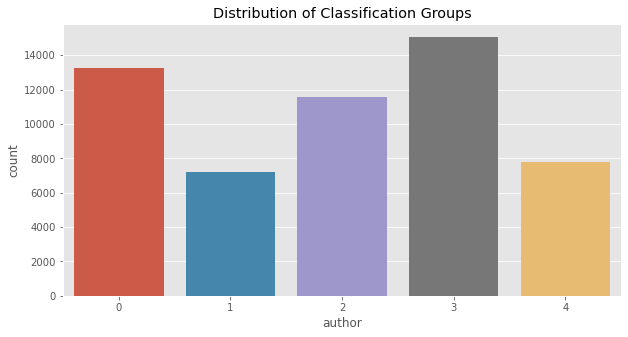

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
#create graphs
graph1 = sns.countplot(x = 'author', data = train)

#give title and plot
plt.title('Distribution of Classification Groups')
plt.show(graph1)

## 기본 기능 추가  

도움이 되는 몇 가지 새로운 기능을 쉽게 추가할 수 있다.   
만약 새로운 특징들이 유용하다고 생각한다면, 그것들을 텍스트 데이터와 함께  신경 네트워크를 위한 입력으로 추가 가능하다.

In [11]:
total = train.append(test)

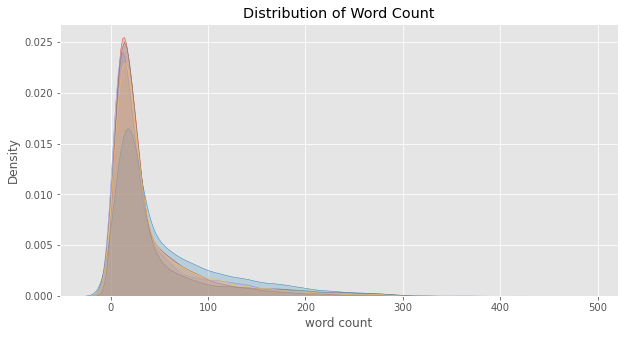

In [18]:
#create column for the number of words in tweet
total['word count'] = total['text'].apply(lambda x: len(x.split()))

#split so we can use updated train set with new feature
train = total[:len(train)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train['word count'][train['author'] == 0], shade = True, label = '0')
sns.kdeplot(train['word count'][train['author'] == 1], shade = True, label = '1')
sns.kdeplot(train['word count'][train['author'] == 2], shade = True, label = '2')
sns.kdeplot(train['word count'][train['author'] == 3], shade = True, label = '3')
sns.kdeplot(train['word count'][train['author'] == 4], shade = True, label = '4')


#set title and plot
plt.title('Distribution of Word Count')
plt.show()

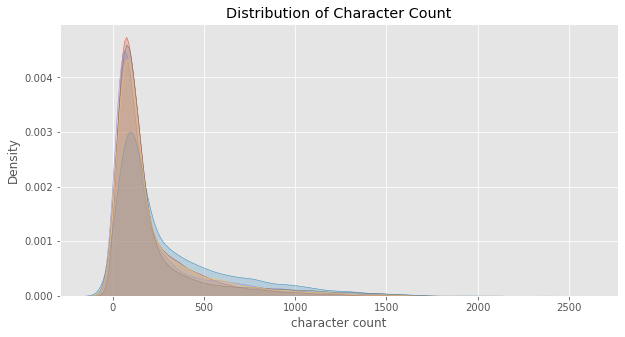

In [19]:
#create column for the number of characters in a tweet
total['character count'] = total['text'].apply(lambda x: len(x))

#split so we can use updated train set with new feature
train = total[:len(train)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train['character count'][train['author'] == 0], shade = True, label = '0')
sns.kdeplot(train['character count'][train['author'] == 1], shade = True, label = '1')
sns.kdeplot(train['character count'][train['author'] == 2], shade = True, label = '2')
sns.kdeplot(train['character count'][train['author'] == 3], shade = True, label = '3')
sns.kdeplot(train['character count'][train['author'] == 4], shade = True, label = '4')


#set title and plot
plt.title('Distribution of Character Count')
plt.show()


대다수가 500자 이하 분포  
(길이를 어느정도 제한 했을경우 손실 발생 가능성 O)

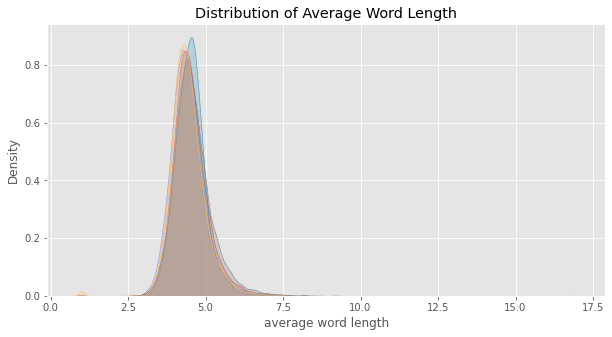

In [20]:
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

#broadcast to text column
total['average word length'] = total['text'].apply(average_word_length)

#split so we can use updated train set with new feature
train = total[:len(train)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train['average word length'][train['author'] == 0], shade = True, label = '0')
sns.kdeplot(train['average word length'][train['author'] == 1], shade = True, label = '1')
sns.kdeplot(train['average word length'][train['author'] == 2], shade = True, label = '2')
sns.kdeplot(train['average word length'][train['author'] == 3], shade = True, label = '3')
sns.kdeplot(train['average word length'][train['author'] == 4], shade = True, label = '4')

#set title
plt.title('Distribution of Average Word Length')

#splot graphs
plt.show()

### 추가적인 기능(about stopword) 분포
참고> https://www.kaggle.com/tuckerarrants/disaster-tweets-eda-glove-rnns-bert

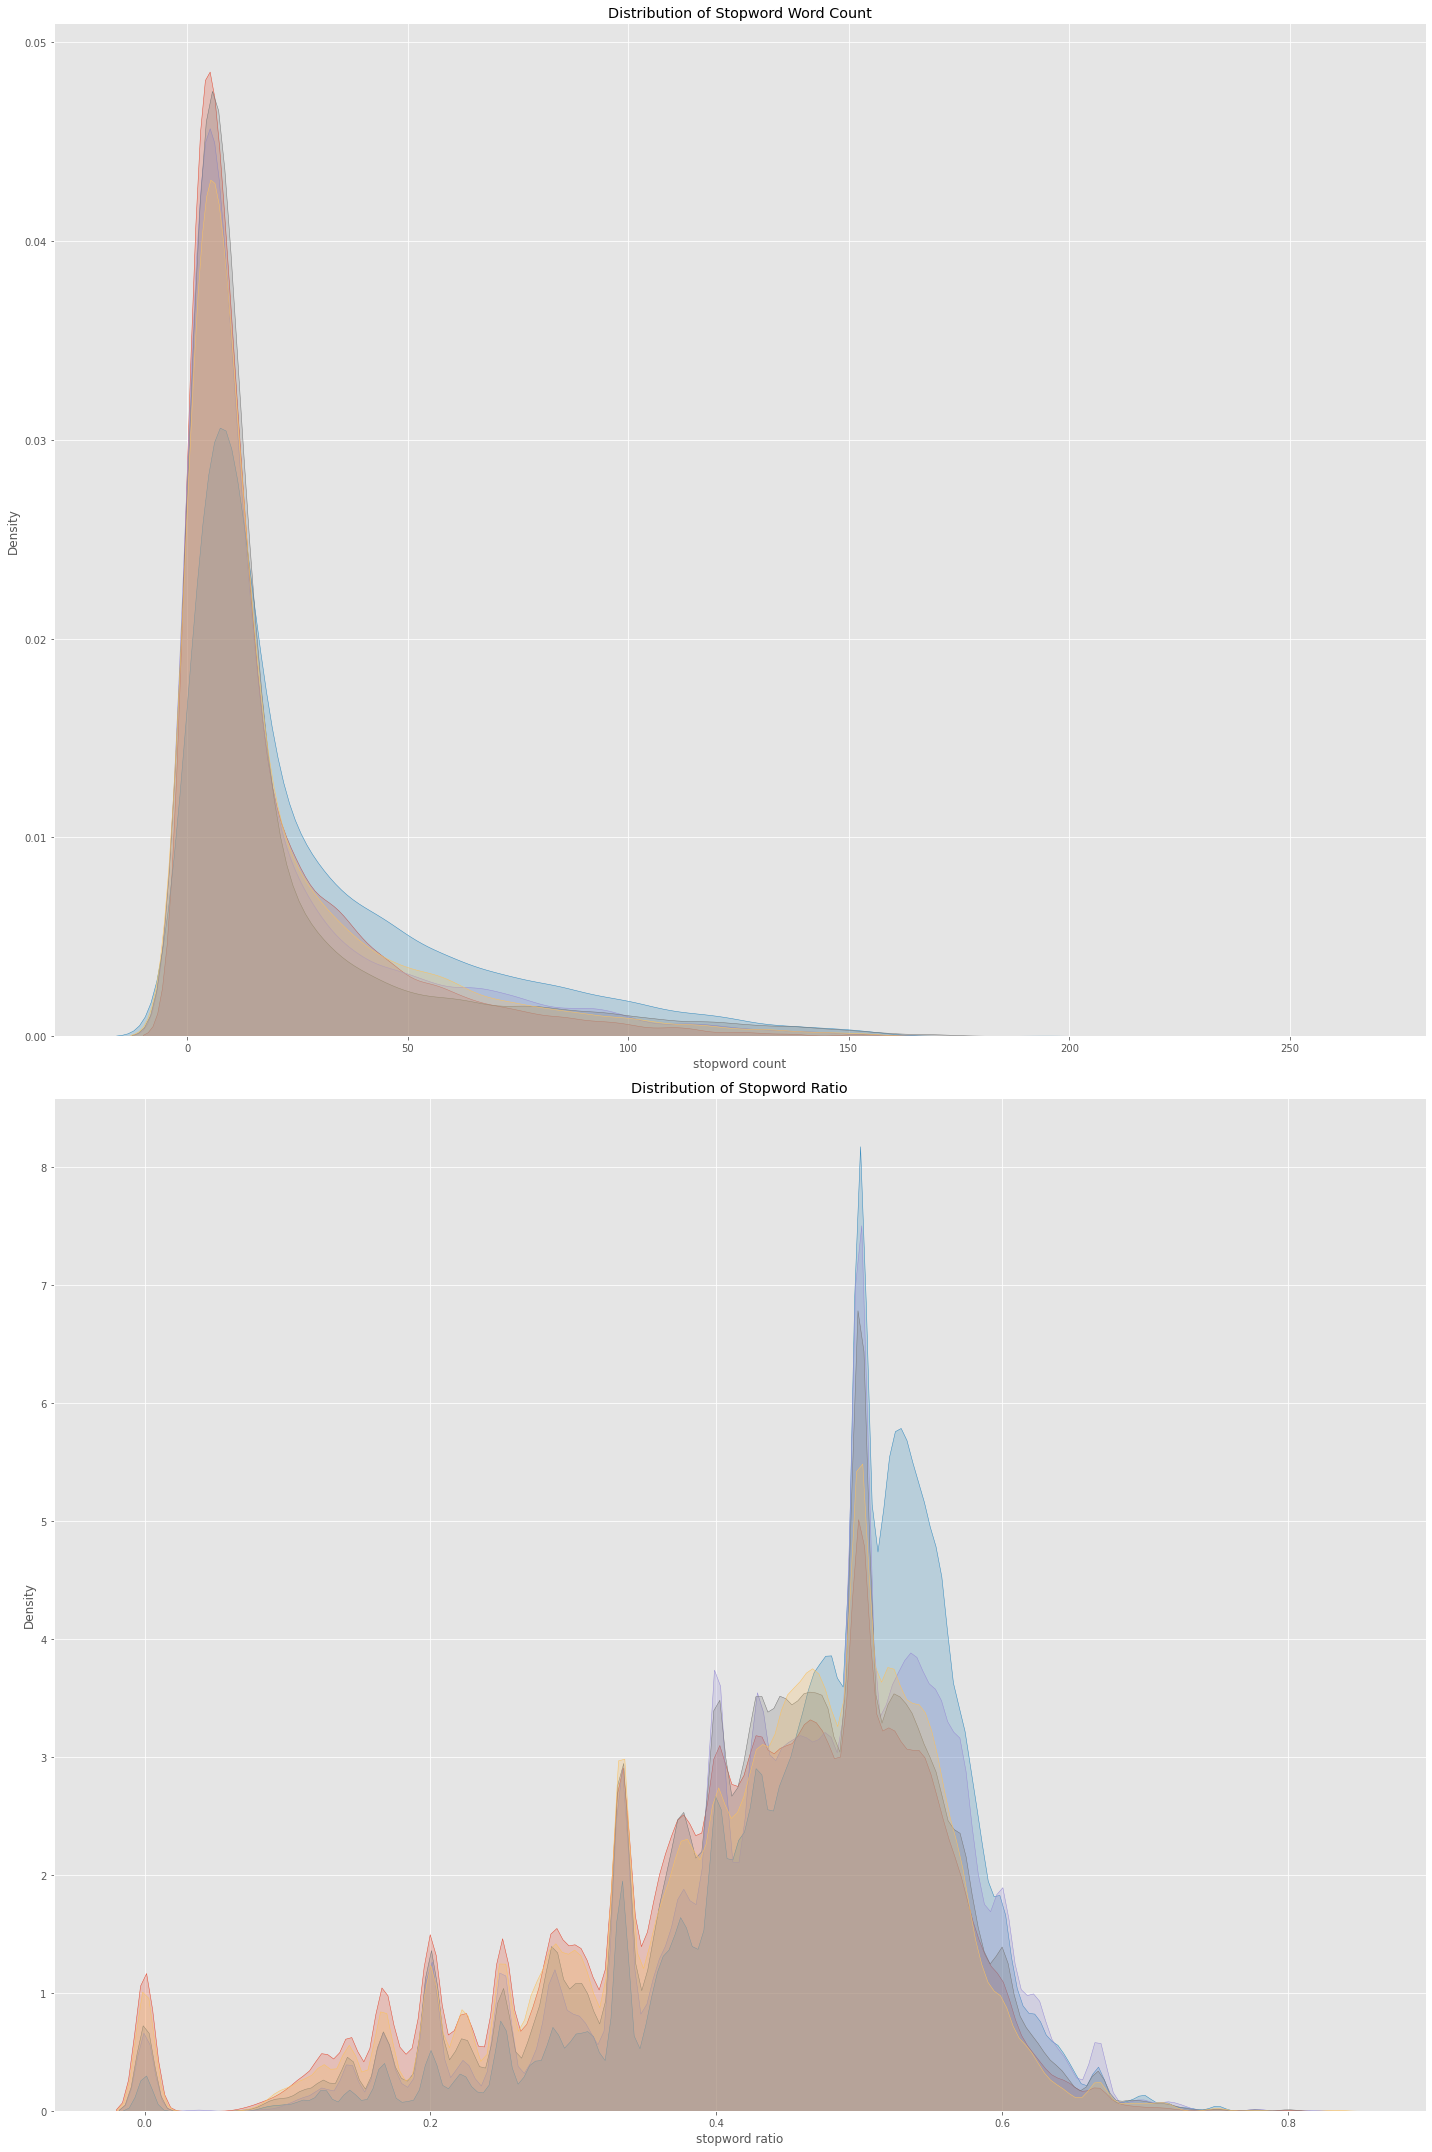

In [21]:
#add stopword count
total['stopword count'] = total['text'].apply(lambda x: len([i for i in x.lower().split() if i in wordcloud.STOPWORDS]))

#add stopword ratio
total['stopword ratio'] = total['stopword count'] / total['word count']

#split so we can use updated train set
train = total[:len(train)]

a = train['author'] == 0
b = train['author'] == 1
c = train['author'] == 2
d = train['author'] == 3
e = train['author'] == 4

#produce graphs to visualize newly added features
fig, axes = plt.subplots(2, figsize=(20, 30))

graph2 = sns.kdeplot(train.loc[a]['stopword count'], shade = True, label = '0', ax=axes[0])
graph2 = sns.kdeplot(train.loc[b]['stopword count'], shade = True, label = '1', ax=axes[0])
graph2 = sns.kdeplot(train.loc[c]['stopword count'], shade = True, label = '2', ax=axes[0])
graph2 = sns.kdeplot(train.loc[d]['stopword count'], shade = True, label = '3', ax=axes[0])
graph2 = sns.kdeplot(train.loc[e]['stopword count'], shade = True, label = '4', ax=axes[0])
graph2.set_title('Distribution of Stopword Word Count')

graph4 = sns.kdeplot(train.loc[a]['stopword ratio'], shade = True, label = '0', ax=axes[1], bw = .05)
graph4 = sns.kdeplot(train.loc[b]['stopword ratio'], shade = True, label = '1', ax=axes[1], bw = .05)
graph4 = sns.kdeplot(train.loc[c]['stopword ratio'], shade = True, label = '2', ax=axes[1], bw = .05)
graph4 = sns.kdeplot(train.loc[d]['stopword ratio'], shade = True, label = '3', ax=axes[1], bw = .05)
graph4 = sns.kdeplot(train.loc[e]['stopword ratio'], shade = True, label = '4', ax=axes[1], bw = .05)
graph4.set_title('Distribution of Stopword Ratio')

fig.tight_layout()
plt.show()

In [22]:
#remove stopwords
def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in wordcloud.STOPWORDS])

#remove words more than 450 
def remove_more_than(x):
    return ' '.join([i for i in x.split() if len(i) < 450])

#remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

In [23]:
from autocorrect import Speller 

#create function to spell check strings
def spell_check(x):
    spell = Speller(lang='en')
    return " ".join([spell(i) for i in x.split()])


In [24]:
total['text'] = total['text'].apply(lambda x: x.lower())
total['text'] = total['text'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x, flags = re.MULTILINE))
total['text'] = total['text'].apply(remove_stopwords)
total['text'] = total['text'].apply(remove_more_than)
total['text'] = total['text'].apply(remove_non_alphabet)

In [25]:
total['text'] = total['text'].apply(spell_check) ##계산적으로 무거움..그러나 한번 시도해봄

In [26]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions = contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, s)

In [ ]:
total['text'] = total['text'].apply(expand_contractions)

In [ ]:
train = total[:len(train)]
test = total[len(train):]

**remove_stopwords,remove_non_alphabet,spell_check 등의 추가적으로  
함수 적용 여부에 따라서도 성능차가 있는지 보았을때 소수 둘째 자리정도의 미묘한 차이지만  
"spell_check"와 "remove_more_than" 적용을 제거했을때 성능이 낮아졌음

## 토큰화

In [51]:
from keras.preprocessing.sequence import pad_sequences
from keras import Input
from keras.preprocessing.text import Tokenizer
tweets = [tweet for tweet in total['text']]
#define tokenizer options
tokenizer = Tokenizer()     
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences)
labels = train['author']
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

nlp_train = data[:len(train)]
labels = labels
nlp_test = data[len(train):]

MAX_SEQUENCE_LENGTH = data.shape[1]
print(data.shape[0],data.shape[1])

Found 23468 unique tokens.
Shape of data tensor: (74496, 162)
Shape of label tensor: (54879,)
74496 162


In [52]:
data

array([[   0,    0,    0, ..., 1321,   33, 1028],
       [   0,    0,    0, ...,    0,  291,   84],
       [   0,    0,    0, ...,  211,  314, 4153],
       ...,
       [   0,    0,    0, ...,   11,   79,  657],
       [   0,    0,    0, ...,  628,  477, 4271],
       [   0,    0,    0, ..., 8075,  667,  498]], dtype=int32)

In [53]:
#from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=500)
#text_ds = tf.data.Dataset.from_tensor_slices(total).batch(128)
#vectorizer.adapt(text_ds)
#vectorizer.get_vocabulary()[:5]

#voc = vectorizer.get_vocabulary()
#word_index = dict(zip(voc, range(len(voc))))

## glove
이를 적용하면 위 토큰화는 큰 의미 없는것 같다..

In [54]:
#get GloVe vector embeddings
from pathlib import Path
data_dir = Path('./data')
glove_file = data_dir / 'glove.6B.300d.txt'
embeddings_index = {}
with open(glove_file,encoding='UTF8') as f:
    for line in tqdm(f):
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
        
print(f'Found {len(embeddings_index)} word vectors.')
print('Found %s word vectors in the GloVe library' % len(embeddings_index))

400000it [00:18, 21372.28it/s]

Found 400000 word vectors.
Found 400000 word vectors in the GloVe library


In [55]:
EMBEDDING_DIM = 300   #defined by size of GloVe word vector dimensions
hits = 0
misses = 0

In [56]:
# Prepare embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        
print(f"Converted {hits} words ({misses} misses)")
print("Our embedded matrix is of dimension", embedding_matrix.shape)

Converted 21629 words (1839 misses)
Our embedded matrix is of dimension (23469, 300)


In [57]:
#import neural network basic
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Dropout, Concatenate, LeakyReLU, GRU
from keras import Input, Model, regularizers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping

embedding = Embedding(len(word_index) + 1, 
                      EMBEDDING_DIM, 
                      weights = [embedding_matrix],
                      input_length = MAX_SEQUENCE_LENGTH, 
                      trainable = False)  

#we do not want embedding layer to train since it has been pretrained

모델에게 단어 임베딩만 먹이면 되지만, 초기에 추가된 기능들을 추가해서 성능을 향상 가능성 있음  

이 '메타 입력'에는 더 이상 모델에서 사용할 수 없는 text에 대한 정보가 포함(텍스트를 clean하게 처리땜에 없지만 이걸로 추가)  

모델에 이러한 기능을 포함하기 위해 NLP 데이터를 LSTM 계층을 통해 전달하고 최종 계층보다 먼저 확장된 메타 입력을 추가한다.

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale(df, scaler):
    return scaler.fit_transform(df.iloc[:, 3:])#word count 부터

#and scal
meta_train = scale(train, StandardScaler())
meta_test = scale(test, StandardScaler())

In [72]:
train.iloc[:, 3:]

,word count,character count,average word length,stopword count,stopword ratio
0,46,240,4.239130,25,0.543478
1,7,38,4.571429,2,0.285714
2,57,320,4.614035,26,0.456140
3,58,319,4.517241,26,0.448276
4,39,228,4.871795,16,0.410256
...,...,...,...,...,...
54874,15,84,4.666667,4,0.266667
54875,18,94,4.277778,11,0.611111
54876,8,59,6.375000,1,0.125000
54877,8,39,4.000000,4,0.500000


## lstm
character count, average word length, stopword count, stopword ratio  
위 4가지 기능들 하나씩 lstm 모델을 가지고 테스트   
(참고. 임베딩층 trainable = false)

In [76]:
#function to create dual lstm model
def create_dual_lstm(spatial_dropout, dropout, recurrent_dropout, learning_rate, bidirectional = False):
    #define activation
    activation = LeakyReLU(alpha = 0.01)
    
    #define inputs
    nlp_input = Input(shape = (MAX_SEQUENCE_LENGTH,), name = 'nlp_input')
    meta_input_train = Input(shape = (5, ), name = 'meta_train')
    emb = embedding(nlp_input)
    emb = SpatialDropout1D(dropout)(emb)

    #add dual LSTM layers
    if bidirectional:
        nlp_out = (Bidirectional(LSTM(100, dropout = dropout, recurrent_dropout = recurrent_dropout,
                                 kernel_initializer = 'orthogonal', return_sequences = True)))(emb)
        nlp_out = SpatialDropout1D(dropout)(nlp_out)
        nlp_out = (Bidirectional(LSTM(100, dropout = dropout, recurrent_dropout = recurrent_dropout,
                                 kernel_initializer = 'orthogonal')))(emb)
    else:
        nlp_out = (LSTM(100, dropout = dropout, recurrent_dropout = recurrent_dropout,
                                 kernel_initializer = 'orthogonal', return_sequences = True))(emb)
        nlp_out = SpatialDropout1D(dropout)(nlp_out)
        nlp_out = (LSTM(100, dropout = dropout, recurrent_dropout = recurrent_dropout,
                                 kernel_initializer = 'orthogonal'))(emb)
     
    #add meta data    
    x = Concatenate()([nlp_out, meta_input_train])
    
    #add second hidden layer
    #x = Dropout(dropout)(x)
    #x = (Dense(100, activation = activation, kernel_regularizer = regularizers.l2(1e-4),
              #kernel_initializer = 'he_normal'))(x)
    
    #add output layer
    x = Dropout(dropout)(x)
    preds = Dense(5, activation='sigmoid', kernel_regularizer = regularizers.l2(1e-4))(x)
    
    #compile model
    model = Model(inputs=[nlp_input , meta_input_train], outputs = preds)
    optimizer = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [77]:
#define new model
dual_lstm = create_dual_lstm(spatial_dropout = .4, dropout = .4, recurrent_dropout = .4,
                       learning_rate = 3e-4, bidirectional = True)

dual_lstm.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          [(None, 162)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 162, 300)     7040700     nlp_input[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d_6 (SpatialDro (None, 162, 300)     0           embedding[3][0]                  
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 200)          320800      spatial_dropout1d_6[0][0]        
_______________________________________________________________________________________

In [80]:
from tensorflow.keras.utils import  to_categorical
to_categorical(labels) #to_categorical(y[i_trn])

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [88]:
callback = EarlyStopping(monitor = 'val_loss', patience = 4)

history3 = dual_lstm.fit([nlp_train, meta_train], to_categorical(labels), validation_split = .2,
         epochs = 25, batch_size = 21, verbose = 1,callbacks=[callback]) #callbacks = [callback]

Epoch 1/25
2091/2091 [==============================] - 510s 244ms/step - loss: 0.4552 - accuracy: 0.3979 - val_loss: 0.4260 - val_accuracy: 0.4527
Epoch 2/25
2091/2091 [==============================] - 517s 247ms/step - loss: 0.4425 - accuracy: 0.4232 - val_loss: 0.4187 - val_accuracy: 0.4659
Epoch 3/25
2091/2091 [==============================] - 512s 245ms/step - loss: 0.4327 - accuracy: 0.4443 - val_loss: 0.4093 - val_accuracy: 0.4803
Epoch 4/25
2091/2091 [==============================] - 524s 250ms/step - loss: 0.4270 - accuracy: 0.4527 - val_loss: 0.4037 - val_accuracy: 0.4913
Epoch 5/25
2091/2091 [==============================] - 584s 279ms/step - loss: 0.4211 - accuracy: 0.4661 - val_loss: 0.3992 - val_accuracy: 0.4997
Epoch 6/25
2091/2091 [==============================] - 584s 279ms/step - loss: 0.4158 - accuracy: 0.4763 - val_loss: 0.3965 - val_accuracy: 0.5006
Epoch 7/25
2091/2091 [==============================] - 581s 278ms/step - loss: 0.4116 - accuracy: 0.4827 - val_

In [86]:
nlp_test

array([[   0,    0,    0, ...,  556, 1785, 8062],
       [   0,    0,    0, ...,  172,  841,   56],
       [   0,    0,    0, ..., 3210, 2197, 2121],
       ...,
       [   0,    0,    0, ...,   11,   79,  657],
       [   0,    0,    0, ...,  628,  477, 4271],
       [   0,    0,    0, ..., 8075,  667,  498]], dtype=int32)

In [85]:
meta_test

array([[-0.01987024, -0.09746451, -0.75253375,  0.12277667,  0.97063322],
       [-0.80643572, -0.8287077 , -0.67256102, -0.74101602,  0.51494287],
       [-0.44735148, -0.34951004,  1.36459459, -0.4210928 ,  0.18886711],
       ...,
       [-0.53284773, -0.52065206,  0.07380882, -0.35710816,  1.50265939],
       [-0.46445073, -0.43663689,  0.36007296, -0.45308512,  0.05869072],
       [ 0.49310725,  0.69290047,  1.65002696,  0.47469221,  0.13773521]])

In [89]:
p_tst=dual_lstm.predict([nlp_test, meta_test])
#p_tst=dual_lstm.predict(test)

In [90]:
p_tst

array([[0.05416662, 0.3855822 , 0.0150654 , 0.54873246, 0.02539289],
       [0.69215727, 0.13304079, 0.01098236, 0.022109  , 0.24673504],
       [0.42670953, 0.3416168 , 0.01357487, 0.05025497, 0.06898797],
       ...,
       [0.20858598, 0.713287  , 0.02550745, 0.02959585, 0.07660368],
       [0.07322294, 0.6247094 , 0.09850049, 0.05510601, 0.13480747],
       [0.0308435 , 0.0119082 , 0.0088284 , 0.9591141 , 0.02635142]],
      dtype=float32)

## 제출 파일
테스트 용으로 많이 제출하지는 않음..

In [93]:
sub = pd.read_csv('./data/sample_submission.csv',index_col=0)    
print(sub.shape)

(19617, 5)


In [95]:
sub[sub.columns] = p_tst
sub.to_csv("DlstmTest.csv") # contest: 0.8944